In [1]:
import numpy as np
import pandas as pd 
from array import array
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans

In [2]:
carcass_complete_df = pd.read_csv('DataWithLabels.csv')
cutting_table_df = pd.read_csv('CuttingTable.csv')

In [3]:
carcass_complete_df

,Killnumber,KillDate,AnimalType,Class,Fat,Weight,WeightWarm,ClassificationTime,AgeMonths,Remark,PartCassation,Group
0,21508,2020-11-15,222,6,6,354.555,361.791,2020-11-15 16:20:20.827000000,18,457\n590,NaN,10
1,21508,2021-02-01,216,4,6,249.636,254.701,2021-02-01 13:57:25,17,77\n338\n590\n814,NaN,6
2,21508,2021-04-17,222,8,4,323.338,329.954,2021-04-17 13:40:16.800000000,13,466,NaN,1
3,21508,2021-07-03,216,8,8,322.925,329.540,2021-07-03 16:04:26.010000000,24,339\n387\n588\n703,NaN,3
4,21508,2021-09-05,219,5,7,324.372,330.987,2021-09-05 15:43:20.243000000,17,339\n590,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
74544,21507,2021-04-17,222,8,5,253.254,258.422,2021-04-17 13:39:05.800000000,13,117\n466,NaN,1
74545,21507,2021-11-09,224,7,6,357.553,364.892,2021-11-09 13:41:08.383000000,29,113\n589,NaN,0
74546,21508,2020-03-21,218,3,2,263.798,269.173,2020-03-21 12:00:55,41,77\n338\n589,NaN,5
74547,21508,2020-06-17,216,5,8,238.472,243.330,2020-06-17 13:33:05,25,339\n590,NaN,6


In [4]:
cutting_table_df

,Killnumber,KillDate,SlaughterPlant,TableId,CrDate,ChgDate
0,22045,2020-01-03,125,11,2020-01-05 05:22:14.473000000,2020-01-05 05:22:14.473000000
1,22045,2020-01-03,125,11,2020-01-05 05:22:15.897000000,2020-01-05 05:22:15.897000000
2,22045,2020-01-03,125,11,2020-01-05 05:22:17.130000000,2020-01-05 05:22:17.130000000
3,22045,2020-01-03,125,11,2020-01-05 05:22:20.860000000,2020-01-05 05:22:20.860000000
4,22033,2020-01-03,125,12,2020-01-05 05:23:10.997000000,2020-01-05 05:23:10.997000000
...,...,...,...,...,...,...
270031,20653,2022-01-16,125,9,2022-01-18 09:58:22.360000000,2022-01-18 09:58:22.360000000
270032,20655,2022-01-16,125,7,2022-01-18 10:00:46.387000000,2022-01-18 10:00:46.387000000
270033,20655,2022-01-16,125,7,2022-01-18 10:00:47.363000000,2022-01-18 10:00:47.363000000
270034,20655,2022-01-16,125,7,2022-01-18 10:00:48.287000000,2022-01-18 10:00:48.287000000


In [5]:
merged_df = pd.merge(carcass_complete_df, cutting_table_df, on=['Killnumber', 'KillDate'])

In [6]:
print(len(merged_df[merged_df.TableId == 12]))
print(len(merged_df[merged_df.TableId == 13]))
print(len(merged_df[merged_df.TableId == 14]))

22740
922
39


In [7]:
# Table 13 and 14 are droped because they have to small of a sample size, 
# only having 922 and 39 while all other tables have little more than 20 000 samples 
merged_df = merged_df[merged_df.TableId != 13]
merged_df = merged_df[merged_df.TableId != 14]

In [8]:
merged_df.dtypes

Killnumber              int64
KillDate               object
AnimalType              int64
Class                   int64
Fat                     int64
Weight                float64
WeightWarm            float64
ClassificationTime     object
AgeMonths               int64
Remark                 object
PartCassation         float64
Group                   int64
SlaughterPlant          int64
TableId                 int64
CrDate                 object
ChgDate                object
dtype: object

In [9]:
merged_df = merged_df.drop(['SlaughterPlant', 'ChgDate', 'WeightWarm', 'PartCassation'], axis=1)

In [10]:
carcass_striped_df = merged_df[['Group', 'Killnumber', 'TableId', 'CrDate']].copy()
carcass_striped_df

,Group,Killnumber,TableId,CrDate
0,10,21508,10,2020-11-17 11:20:27.747000000
1,10,21508,10,2020-11-17 11:20:28.873000000
2,10,21508,10,2020-11-17 11:20:30.060000000
3,10,21508,10,2020-11-17 11:20:31.170000000
4,6,21508,8,2021-02-06 09:09:15.647000000
...,...,...,...,...
267958,6,21508,5,2020-06-21 13:57:29.267000000
267959,0,21508,2,2020-09-08 09:35:29.193000000
267960,0,21508,2,2020-09-08 09:35:30.867000000
267961,0,21508,2,2020-09-08 09:35:32.480000000


In [11]:
from datetime import datetime
from datetime import timedelta
from typing import List, Tuple
from collections import defaultdict
from tqdm import tqdm

class Carcass:
    def __init__(self, cluster: int, killnumber: int, cuttingTable: int, crDate: datetime):
        self.cluster = cluster
        self.killnumber = killnumber
        self.cuttingTable = cuttingTable
        self.crDate = crDate

class LisaAIClustering:
    def TimeDifference(self, tableObject, carcassTracker):
        if len(carcassTracker.crDate) > 19:  
            carcassTracker.crDate = carcassTracker.crDate[:25]
            carcassTrackerDate = datetime.strptime(carcassTracker.crDate, '%Y-%m-%d %H:%M:%S.%f')
        elif len(carcassTracker.crDate) == 19:
            carcassTrackerDate = datetime.strptime(carcassTracker.crDate, '%Y-%m-%d %H:%M:%S')
        else:
            print("Bad string lenght; object has not been conted")
            return

        if len(tableObject.crDate) > 19: 
            tableObject.crDate = tableObject.crDate[:25]
            dateTimetableObjectDate = datetime.strptime(tableObject.crDate, '%Y-%m-%d %H:%M:%S.%f')
        elif len(tableObject.crDate) == 19:
            dateTimetableObjectDate = datetime.strptime(tableObject.crDate, '%Y-%m-%d %H:%M:%S')
        else:
            print("Bad string lenght; object has not been conted")
            return

        return (dateTimetableObjectDate - carcassTrackerDate)
            
    def CalculateTableScore(self, carcasses: List[Carcass]) -> List[Tuple[int, int, int]]:
        carcassPerTablePerDay = defaultdict(lambda: defaultdict(list))
        timePerTablePerCluster = defaultdict(list)
        result = defaultdict(list)
        
        #sorting carcasses on crdate
        carcasses.sort(key=lambda x: x.crDate, reverse=False)
        
        # Grouping data to day and table
        for carcass in tqdm(carcasses, total=len(carcasses), ncols = 100, desc ="Grouping data to day and table"):
            date = (carcass.crDate).split()
            if date[0] not in carcassPerTablePerDay:
                carcassPerTablePerDay[date[0]] = {}
            if carcass.cuttingTable not in carcassPerTablePerDay[date[0]]:
                carcassPerTablePerDay[date[0]][carcass.cuttingTable] = []
            carcassPerTablePerDay[date[0]][carcass.cuttingTable].append(carcass) 
            
        for dayKey in tqdm(carcassPerTablePerDay, total=len(carcassPerTablePerDay), ncols = 100, desc ="Calculating average time"):
            dayObject = carcassPerTablePerDay[dayKey]
            for tableKey in dayObject:
                if not tableKey:
                    continue
                tableObject = dayObject[tableKey]
                carcassTracker = tableObject[0]
                if (tableObject[0].cluster, tableKey) not in timePerTablePerCluster:
                    timePerTablePerCluster[(tableObject[0].cluster, tableKey)] = []
                    
                for i in range(1, len(tableObject)):
                    if carcassTracker.killnumber != tableObject[i].killnumber:                        
                        timedif = self.TimeDifference(tableObject[i], carcassTracker)
                        if timedif is None: continue
                        
                        timePerTablePerCluster[(tableObject[0].cluster, tableKey)].append(timedif)
                        
                    carcassTracker = tableObject[i]
                    if (tableObject[i].cluster, tableKey) not in timePerTablePerCluster:
                        timePerTablePerCluster[(tableObject[i].cluster, tableKey)] = []   
                    
        for x in timePerTablePerCluster.items():
            totalTime = sum(x[1], timedelta(seconds=0))
            if (totalTime == 0 or len(x[1]) == 0):
                print(f" table {x[0][1]} was removed on cluster {x[0][0]} because no time was found")
                continue
            result[(x[0][0], x[0][1])].append(totalTime // len(x[1]))
#        for x in result.items():  
#            print(f"table {x[0][1]} had average time of {x[1]} on cluster {x[0][0]}")
        
        return result

In [12]:
LisaCalculateTime = LisaAIClustering()
carcasses = []
for carcass in carcass_striped_df.to_dict('records'):
    carcasses.append(Carcass(carcass['Group'], carcass['Killnumber'], carcass['TableId'], carcass['CrDate']))
          
table_average_time_per_cluster_dict = LisaCalculateTime.CalculateTableScore(carcasses) 
sorted_dict = dict(sorted(table_average_time_per_cluster_dict.items()))
for x in sorted_dict.items():  
    print(f"table {x[0][1]} had average time of {x[1][0]} on cluster {x[0][0]}")

performance_df = pd.DataFrame()
for x in sorted_dict.items():
    data1 = {
        "class": [x[0][0]],
        "table": [x[0][1]],
        "time": [x[1][0]]
    }
    performance_df = pd.concat([performance_df, pd.DataFrame(data1)], ignore_index=True)



Calculating average time: 100%|██████████████████████████████████| 515/515 [00:01<00:00, 339.04it/s]

table 1 had average time of 0:33:56.859728 on cluster 0
table 2 had average time of 0:26:52.050102 on cluster 0
table 3 had average time of 0:26:43.017789 on cluster 0
table 4 had average time of 0:34:03.272256 on cluster 0
table 5 had average time of 0:25:10.243988 on cluster 0
table 6 had average time of 0:31:50.522225 on cluster 0
table 7 had average time of 0:31:42.160582 on cluster 0
table 8 had average time of 0:31:52.492857 on cluster 0
table 9 had average time of 0:33:18.326799 on cluster 0
table 10 had average time of 0:25:56.591053 on cluster 0
table 11 had average time of 0:27:40.108253 on cluster 0
table 12 had average time of 0:29:57.244029 on cluster 0
table 1 had average time of 0:34:09.570805 on cluster 1
table 2 had average time of 0:27:16.912094 on cluster 1
table 3 had average time of 0:26:04.610633 on cluster 1
table 4 had average time of 0:30:37.520009 on cluster 1
table 5 had average time of 0:24:40.838486 on cluster 1
table 6 had average time of 0:33:53.610299 on

In [13]:
performance_df

,class,table,time
0,0,1,0 days 00:33:56.859728
1,0,2,0 days 00:26:52.050102
2,0,3,0 days 00:26:43.017789
3,0,4,0 days 00:34:03.272256
4,0,5,0 days 00:25:10.243988
...,...,...,...
127,10,8,0 days 00:33:21.690673
128,10,9,0 days 00:31:15.087353
129,10,10,0 days 00:25:38.286898
130,10,11,0 days 00:30:42.418134


In [14]:
def GenerateTables(tageted_class):
    one_class = performance_df.loc[performance_df['class'] == tageted_class]
    one_class = one_class.sort_values(by=['table'])
    one_class = one_class.drop(['class'], axis=1)

    # Convert time deltas to total minutes
    average_minutes = [td.total_seconds() / 60 for td in one_class['time']]

    # Labels for x-axis
    labels = [f'Table {i}' for i in one_class['table']]

    # Plotting the bar chart
    plt.bar(labels, average_minutes)

    # Adding title and labels
    plt.title(f'Performance of tables on class {tageted_class}')
    plt.xlabel('Tables')
    plt.ylabel('Average Minutes')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()

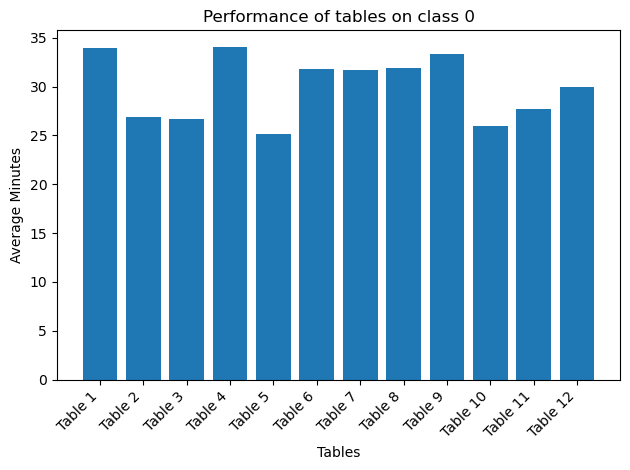

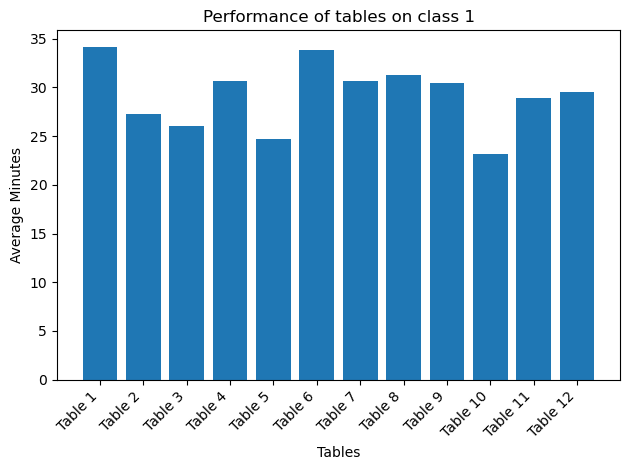

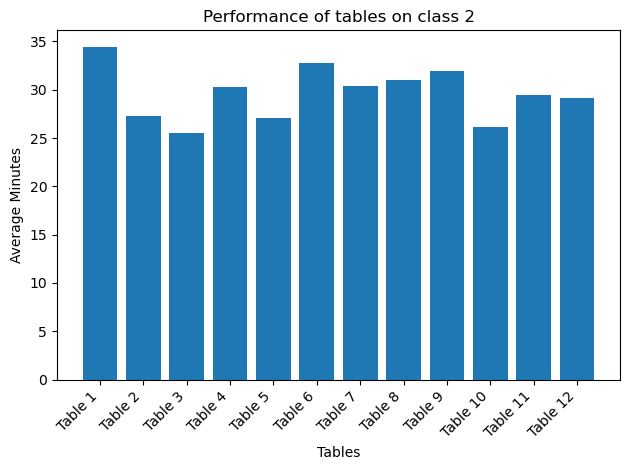

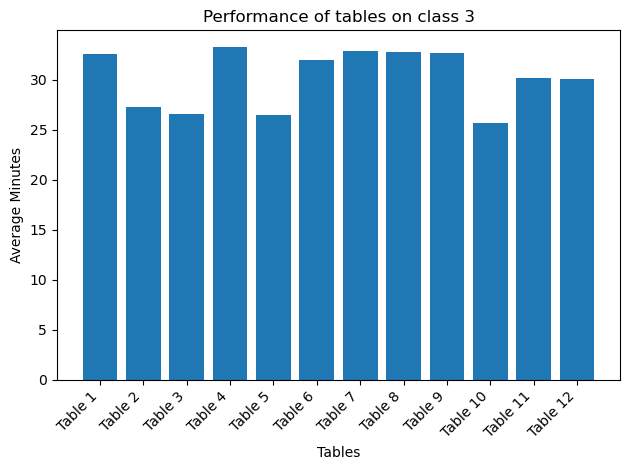

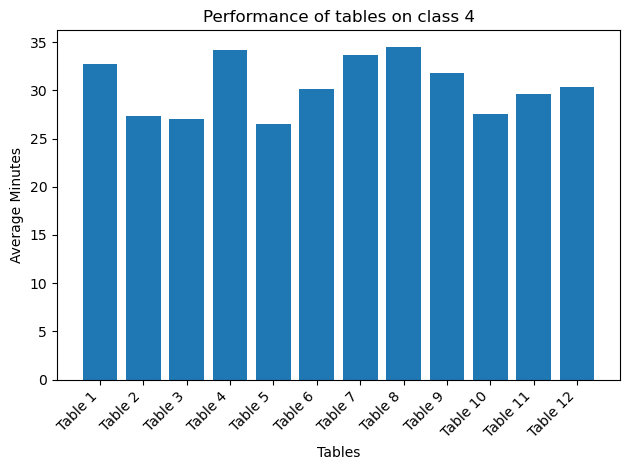

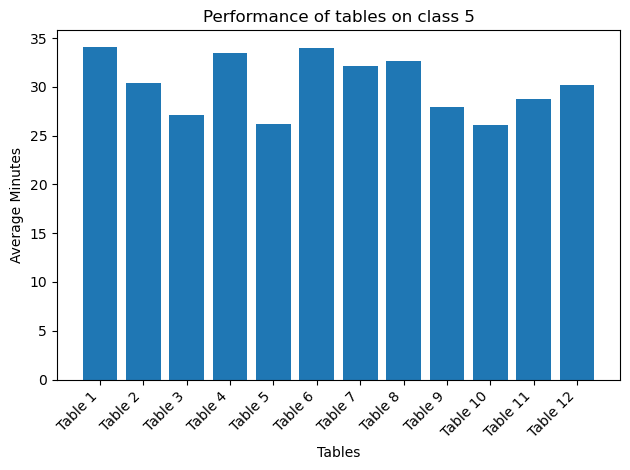

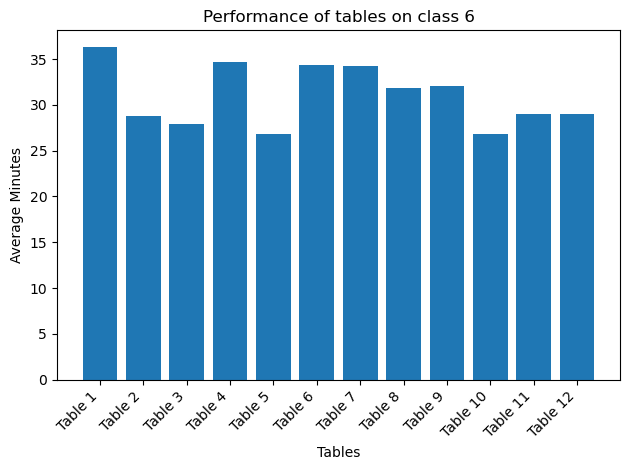

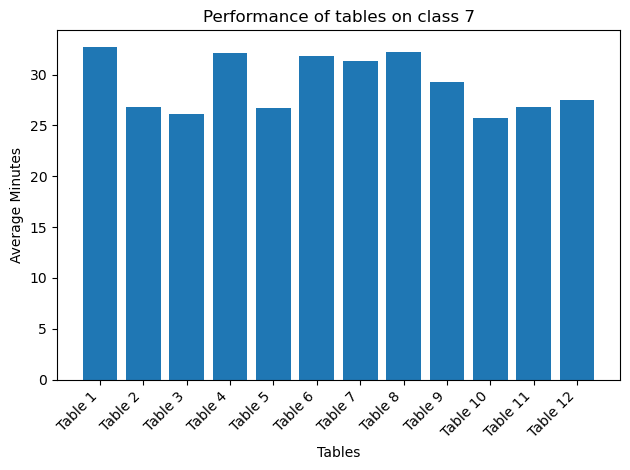

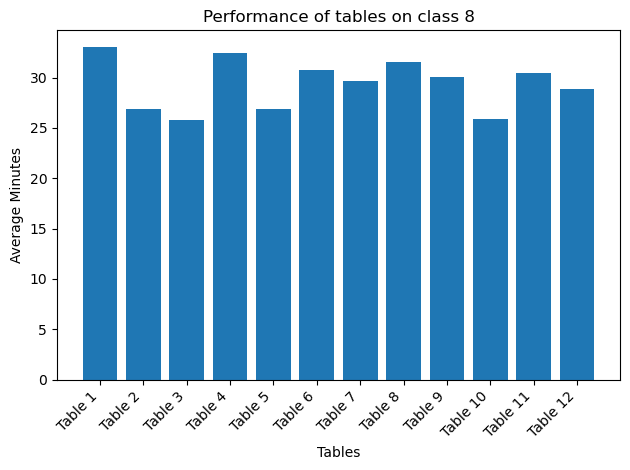

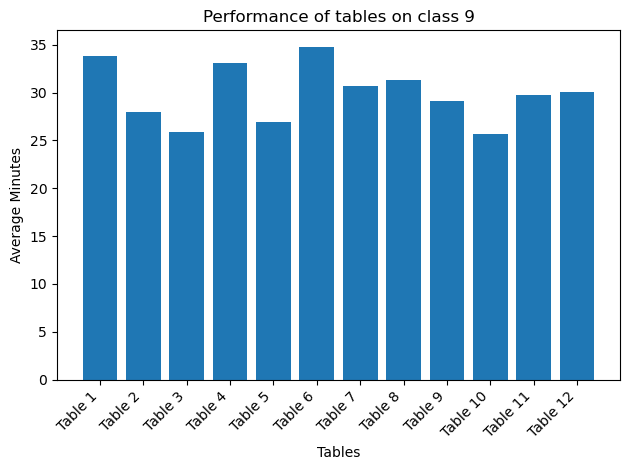

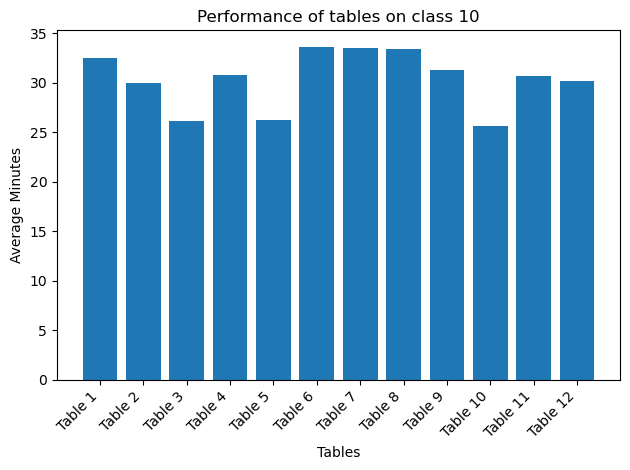

In [15]:
for x in performance_df['class'].unique():
    GenerateTables(tageted_class = x)